In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense, Flatten, ConvLSTM1D,ConvLSTM2D, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [2]:
biological_data = pd.read_csv("biological_data.csv").drop('Unnamed: 0', axis=1)

In [3]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

human_data = biological_data.copy()
human_data['X2'] = human_data.apply(lambda x: getKmers(x['X2']), axis=1)
human_data['X3'] = human_data.apply(lambda x: getKmers(x['X3']), axis=1)

human_data_X2 = list(human_data['X2'])
human_data_X3 = list(human_data['X3'])
for item in range(len(human_data)):
    human_data_X2[item] = ' '.join(human_data_X2[item])
    human_data_X3[item] = ' '.join(human_data_X3[item])
    
y_data = human_data.iloc[:, 0].values

# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
cv = CountVectorizer(ngram_range=(4,4))
X2 = cv.fit_transform(human_data_X2)
X3 = cv.fit_transform(human_data_X3)

X2X3 = np.concatenate((X2.toarray(), X3.toarray()), axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X2X3, y_data, test_size = 0.2, random_state = 42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [4]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.75
                                            , min_lr=0.00001)

In [5]:
x_train = X_train.reshape((X_train.shape[0], 1, 429, 1))
x_valid = X_valid.reshape((X_valid.shape[0], 1, 429, 1))

In [6]:
# ConvLSTM 1D
CL1Dmodel = Sequential()
CL1Dmodel.add(ConvLSTM1D(filters=128, kernel_size=(1), input_shape=(1, 429, 1)))
CL1Dmodel.add(Flatten())
CL1Dmodel.add(Dense(1))
CL1Dmodel.compile(optimizer='adam', loss='mse',metrics=['mse'])
          
history = CL1Dmodel.fit(x_train, y_train, epochs=150, batch_size=8
                        , validation_data=(x_valid, y_valid)
                        , callbacks=[learning_rate_reduction])

2023-01-15 16:05:11.812721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 16:05:11.817156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 16:05:11.817844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 16:05:11.818781: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/150
 22/200 [==>...........................] - ETA: 1s - loss: 109855032.0000 - mse: 109855032.0000

2023-01-15 16:05:14.794357: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


200/200 [==============================] - 4s 9ms/step - loss: 93422512.0000 - mse: 93422512.0000 - val_loss: 82329104.0000 - val_mse: 82329104.0000 - lr: 0.0010
Epoch 2/150
200/200 [==============================] - 2s 8ms/step - loss: 71513496.0000 - mse: 71513496.0000 - val_loss: 65063144.0000 - val_mse: 65063144.0000 - lr: 0.0010
Epoch 3/150
200/200 [==============================] - 2s 8ms/step - loss: 64248836.0000 - mse: 64248836.0000 - val_loss: 63616460.0000 - val_mse: 63616460.0000 - lr: 0.0010
Epoch 4/150
200/200 [==============================] - 2s 8ms/step - loss: 63503428.0000 - mse: 63503428.0000 - val_loss: 63228236.0000 - val_mse: 63228236.0000 - lr: 0.0010
Epoch 5/150
200/200 [==============================] - 2s 8ms/step - loss: 63063216.0000 - mse: 63063216.0000 - val_loss: 62849768.0000 - val_mse: 62849768.0000 - lr: 0.0010
Epoch 6/150
200/200 [==============================] - 2s 8ms/step - loss: 62634740.0000 - mse: 62634740.0000 - val_loss: 62440724.0000 - val_

200/200 [==============================] - 2s 8ms/step - loss: 52960588.0000 - mse: 52960588.0000 - val_loss: 55013972.0000 - val_mse: 55013972.0000 - lr: 5.6250e-04
Epoch 46/150
200/200 [==============================] - 2s 8ms/step - loss: 52932376.0000 - mse: 52932376.0000 - val_loss: 54994804.0000 - val_mse: 54994804.0000 - lr: 4.2187e-04
Epoch 47/150
197/200 [============================>.] - ETA: 0s - loss: 53181672.0000 - mse: 53181672.0000
Epoch 47: ReduceLROnPlateau reducing learning rate to 0.00031640623637940735.
200/200 [==============================] - 2s 8ms/step - loss: 52937172.0000 - mse: 52937172.0000 - val_loss: 54974288.0000 - val_mse: 54974288.0000 - lr: 4.2187e-04
Epoch 48/150
200/200 [==============================] - 2s 8ms/step - loss: 52931824.0000 - mse: 52931824.0000 - val_loss: 54993524.0000 - val_mse: 54993524.0000 - lr: 3.1641e-04
Epoch 49/150
194/200 [============================>.] - ETA: 0s - loss: 53246096.0000 - mse: 53246096.0000
Epoch 49: ReduceLR

Epoch 123/150
200/200 [==============================] - 2s 8ms/step - loss: 52878496.0000 - mse: 52878496.0000 - val_loss: 54982208.0000 - val_mse: 54982208.0000 - lr: 1.0000e-05
Epoch 124/150
200/200 [==============================] - 2s 8ms/step - loss: 52878272.0000 - mse: 52878272.0000 - val_loss: 54982280.0000 - val_mse: 54982280.0000 - lr: 1.0000e-05
Epoch 125/150
200/200 [==============================] - 2s 8ms/step - loss: 52878096.0000 - mse: 52878096.0000 - val_loss: 54982476.0000 - val_mse: 54982476.0000 - lr: 1.0000e-05
Epoch 126/150
200/200 [==============================] - 2s 8ms/step - loss: 52878140.0000 - mse: 52878140.0000 - val_loss: 54981764.0000 - val_mse: 54981764.0000 - lr: 1.0000e-05
Epoch 127/150
200/200 [==============================] - 2s 8ms/step - loss: 52878148.0000 - mse: 52878148.0000 - val_loss: 54981752.0000 - val_mse: 54981752.0000 - lr: 1.0000e-05
Epoch 128/150
200/200 [==============================] - 2s 8ms/step - loss: 52877944.0000 - mse: 52

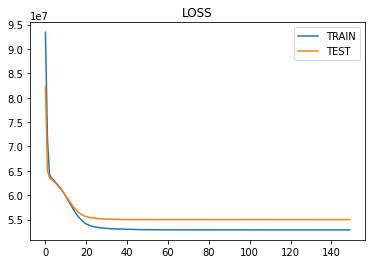

In [7]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

13/13 [==============================] - 0s 2ms/step


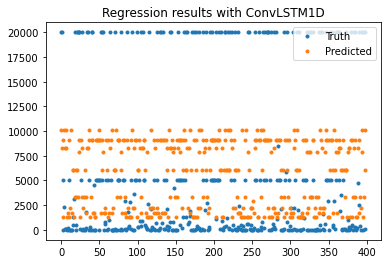

In [8]:
y_pred = CL1Dmodel.predict(x_valid)
x = np.arange(399)
plt.figure()
plt.plot(x,y_valid, '.')
plt.plot(x,y_pred, '.')
plt.legend(["Truth", "Predicted"], loc ="upper right")
plt.title("Regression results with ConvLSTM1D")
plt.show()

In [9]:
# ConvLSTM2D with text prcoessing
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
    char_dict = {}
    for index, val in enumerate(codes):
        char_dict[val] = index+1

    return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))

def integer_encoding(data):
    encode_list = []
    for row in data.values:
        row_encode = []
        for code in row:
            row_encode.append(char_dict.get(code, 0))
        encode_list.append(np.array(row_encode))
  
    return encode_list

data = biological_data.copy()
X2_encode = integer_encoding(data['X2'])
X3_encode = integer_encoding(data['X3']) 

X2_encode = np.array(normalize(X2_encode))
X2_encode = np.concatenate((X2_encode, np.zeros((1995,2))), axis=1)
X3_encode = np.array(normalize(X2_encode))

x2x3 = np.empty((1995, 2, 92))
for i in range(0,1995):
    x2x3[i][0] = X2_encode[i] 
    x2x3[i][1] = X3_encode[i]

{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}
Dict Length: 20


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(x2x3, y_data, test_size = 0.2, random_state = 42)
# X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
X_train = np.reshape(X_train, (X_train.shape[0], 1, 2, 92, 1))
X_valid = np.reshape(X_valid, (X_valid.shape[0], 1, 2, 92, 1))

In [11]:
CL2Dmodel = Sequential()
CL2Dmodel.add(ConvLSTM2D(filters=62, kernel_size=(2,6), activation='relu', input_shape=(1, 2, 92, 1)))
CL2Dmodel.add(Flatten())
CL2Dmodel.add(Dense(1))
CL2Dmodel.compile(optimizer='adam', loss='mse',metrics=['mse'])
          
history = CL2Dmodel.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/150


2023-01-15 16:09:17.835516: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2023-01-15 16:09:18.497836: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-15 16:09:18.497992: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] RESOURCE_EXHAUSTED: /tmp/tempfile-aulus5-5b0f1263-358401-5f24ed9c51c53; No space left on device
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


25/25 [==============================] - 3s 24ms/step - loss: 98458744.0000 - mse: 98458744.0000 - val_loss: 98469592.0000 - val_mse: 98469592.0000
Epoch 2/150
25/25 [==============================] - 0s 16ms/step - loss: 98421792.0000 - mse: 98421792.0000 - val_loss: 98398360.0000 - val_mse: 98398360.0000
Epoch 3/150
25/25 [==============================] - 0s 16ms/step - loss: 98304376.0000 - mse: 98304376.0000 - val_loss: 98227840.0000 - val_mse: 98227840.0000
Epoch 4/150
25/25 [==============================] - 0s 16ms/step - loss: 98069288.0000 - mse: 98069288.0000 - val_loss: 97916976.0000 - val_mse: 97916976.0000
Epoch 5/150
25/25 [==============================] - 0s 15ms/step - loss: 97683760.0000 - mse: 97683768.0000 - val_loss: 97440840.0000 - val_mse: 97440840.0000
Epoch 6/150
25/25 [==============================] - 0s 16ms/step - loss: 97115664.0000 - mse: 97115664.0000 - val_loss: 96757248.0000 - val_mse: 96757248.0000
Epoch 7/150
25/25 [==============================] -

25/25 [==============================] - 0s 16ms/step - loss: 64234920.0000 - mse: 64234920.0000 - val_loss: 64094752.0000 - val_mse: 64094752.0000
Epoch 53/150
25/25 [==============================] - 0s 16ms/step - loss: 64237608.0000 - mse: 64237608.0000 - val_loss: 64094060.0000 - val_mse: 64094060.0000
Epoch 54/150
25/25 [==============================] - 0s 16ms/step - loss: 64229424.0000 - mse: 64229424.0000 - val_loss: 64094204.0000 - val_mse: 64094204.0000
Epoch 55/150
25/25 [==============================] - 0s 16ms/step - loss: 64245704.0000 - mse: 64245704.0000 - val_loss: 64096568.0000 - val_mse: 64096568.0000
Epoch 56/150
25/25 [==============================] - 0s 16ms/step - loss: 64256876.0000 - mse: 64256876.0000 - val_loss: 64092592.0000 - val_mse: 64092592.0000
Epoch 57/150
25/25 [==============================] - 0s 16ms/step - loss: 64234468.0000 - mse: 64234468.0000 - val_loss: 64092236.0000 - val_mse: 64092236.0000
Epoch 58/150
25/25 [===========================

Epoch 103/150
25/25 [==============================] - 0s 16ms/step - loss: 64198444.0000 - mse: 64198444.0000 - val_loss: 64067948.0000 - val_mse: 64067948.0000
Epoch 104/150
25/25 [==============================] - 0s 16ms/step - loss: 64211020.0000 - mse: 64211020.0000 - val_loss: 64068368.0000 - val_mse: 64068368.0000
Epoch 105/150
25/25 [==============================] - 0s 16ms/step - loss: 64197248.0000 - mse: 64197248.0000 - val_loss: 64067052.0000 - val_mse: 64067052.0000
Epoch 106/150
25/25 [==============================] - 0s 16ms/step - loss: 64208204.0000 - mse: 64208204.0000 - val_loss: 64068352.0000 - val_mse: 64068352.0000
Epoch 107/150
25/25 [==============================] - 0s 16ms/step - loss: 64224924.0000 - mse: 64224924.0000 - val_loss: 64066112.0000 - val_mse: 64066112.0000
Epoch 108/150
25/25 [==============================] - 0s 16ms/step - loss: 64197276.0000 - mse: 64197276.0000 - val_loss: 64067116.0000 - val_mse: 64067116.0000
Epoch 109/150
25/25 [=======

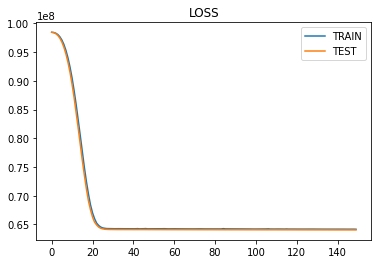

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

13/13 [==============================] - 0s 2ms/step


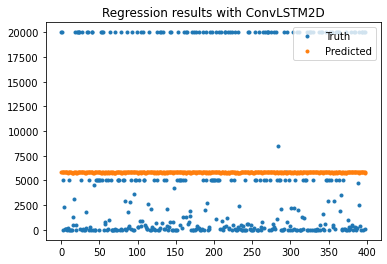

In [14]:
y_pred = CL2Dmodel.predict(X_valid)
x = np.arange(399)
plt.figure()
plt.plot(x,y_valid, '.')
plt.plot(x,y_pred, '.')
plt.legend(["Truth", "Predicted"], loc ="upper right")
plt.title("Regression results with ConvLSTM2D")
plt.show()